In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import numpy as np
from sklearn.metrics import recall_score, precision_score

%matplotlib inline

In [3]:
df_train = pd.read_csv("train_dataset_train.csv")

In [100]:
df_train.head()

,id,Easting,Northing,Height,Reflectance,Class
0,2321251,431696.5375,6.032319e+06,69.2226,-11.14,0
1,3515173,431710.3835,6.032291e+06,68.9711,-15.16,3
2,2320295,431696.8099,6.032322e+06,69.2453,-13.59,0
3,2454459,431680.4542,6.032343e+06,69.1892,-11.21,0
4,4608150,431720.0914,6.032288e+06,67.3252,-9.10,0


## Рассмотрим датасет по ближе

In [101]:
df_train.shape

(4222094, 6)

In [102]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4222094 entries, 0 to 4222093
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   Easting      float64
 2   Northing     float64
 3   Height       float64
 4   Reflectance  float64
 5   Class        int64  
dtypes: float64(4), int64(2)
memory usage: 193.3 MB


Пострим на распределение данных

Text(0.5, 1.0, 'Распределение класса точки')

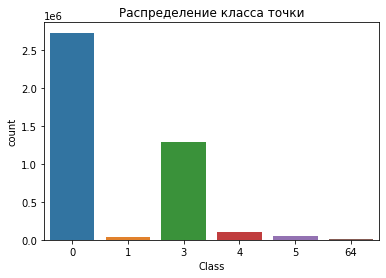

In [8]:
sns.countplot(x = "Class" , data  = df_train).set_title('Распределение класса точки')

In [ ]:
df_1 = df_train.query('Class == 0')
df_2 = df_train.query('Class == 3')
df_3 = df_train.query('Class == 4')
df_4 = df_train.query('Class == 5')
df_5 = df_train.query('Class == 1')
df_6 = df_train.query('Class == 64')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

z1 = df_1['Easting']    #  x - координаты точек
z2 = df_1['Northing']    #  y - координаты точек

fig, ax = plt.subplots()

ax.scatter(z1, z2,
           c = 'brown', s = 1)    #  цвет точек

ax.set_facecolor('white')     #  цвет области Axes
ax.set_title('Один цвет')     #  заголовок для Axes

fig.set_figwidth(8)     #  ширина и
fig.set_figheight(8)    #  высота "Figure"

z3 = df_2['Easting']    #  x - координаты точек
z4 = df_2['Northing']    #  y - координаты точек
ax.scatter(z3, z4,
           c = 'green', s = 1)    #  цвет точек

z5 = df_3['Easting']    #  x - координаты точек
z6 = df_3['Northing']    #  y - координаты точек
ax.scatter(z5, z6,
           c = 'black', s = 1)    #  цвет точек

z7 = df_4['Easting']    #  x - координаты точек
z8 = df_4['Northing']    #  y - координаты точек
ax.scatter(z7, z8,
           c = 'black', s = 1)    #  цвет точек

z9 = df_5['Easting']    #  x - координаты точек
z10 = df_5['Northing']    #  y - координаты точек
ax.scatter(z9, z10,
           c = 'deeppink', s = 1)    #  цвет точек

#z11 = df_6['Easting']    #  x - координаты точек
#z12 = df_6['Northing']    #  y - координаты точек
#ax.scatter(z11, z12,
#           c = 'yellow', s = 1)    #  цвет точек

fig.set_figwidth(14)
fig.set_figheight(14)
plt.show()

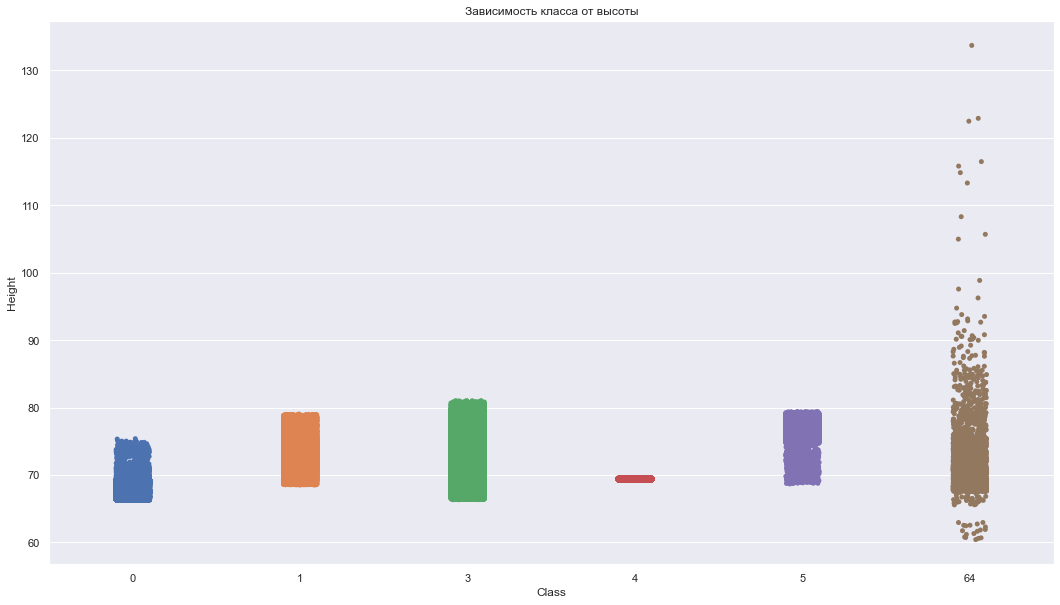

In [4]:
sns.set(rc={'figure.figsize':(18,10)})
sns.stripplot(data = df_train, x= "Class", y = "Height").set_title('Зависимость класса от высоты');

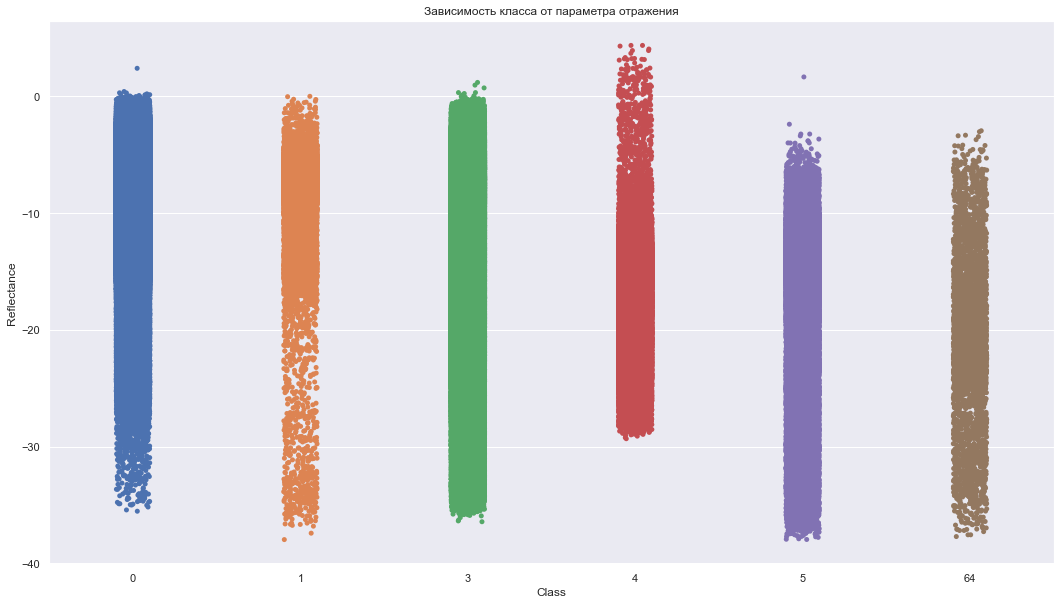

In [9]:
sns.set(rc={'figure.figsize':(18,10)})
sns.stripplot(data = df_train, x= "Class", y = "Reflectance").set_title('Зависимость класса от параметра отражения');

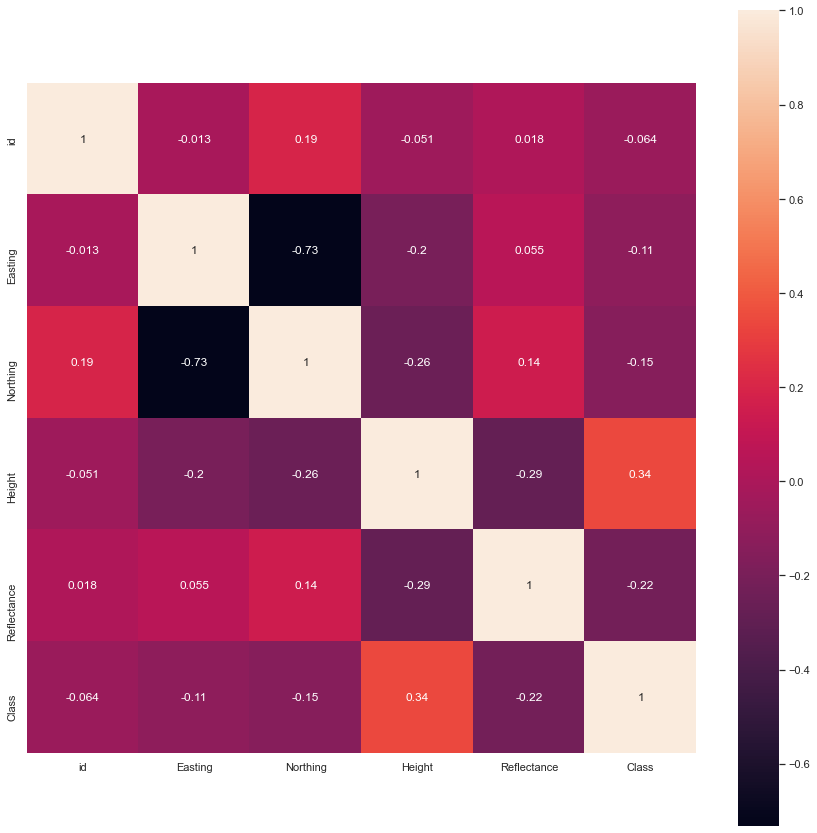

In [10]:
plt.rcParams['figure.figsize']=(15,15)

g = sns.heatmap(df_train.corr(), square = True, annot=True)

In [3]:
df_train['distance'] = (df_train['Easting']**2+df_train['Northing']**2+df_train['Height']**2)**0.5

In [4]:
df_train['Easting'] = round(df_train['Easting'], 2)

In [5]:
df_train['Northing'] = round(df_train['Northing'], 2)

In [6]:
df_train['Height'] = round(df_train['Height'], 2)

In [7]:
df_train['distance'] = round(df_train['distance'], 2)

In [8]:
df_train.head(10)

,id,Easting,Northing,Height,Reflectance,Class,distance
0,2321251,431696.54,6032319.47,69.22,-11.14,0,6047746.70
1,3515173,431710.38,6032290.64,68.97,-15.16,3,6047718.93
2,2320295,431696.81,6032322.46,69.25,-13.59,0,6047749.70
3,2454459,431680.45,6032342.63,69.19,-11.21,0,6047768.65
4,4608150,431720.09,6032287.96,67.33,-9.10,0,6047716.95
5,4791231,431695.37,6032282.25,75.08,-10.33,3,6047709.49
6,41632,431719.17,6032267.69,67.54,-6.79,0,6047696.66
7,3326167,431747.84,6032272.11,69.50,-20.24,4,6047703.11
8,5520637,431687.54,6032341.71,68.36,-11.42,0,6047768.23
9,390686,431717.16,6032267.59,69.54,-8.53,3,6047696.42


In [9]:
df_train.duplicated().sum()

0

## Выделим выборки

In [10]:
df_train = df_train.fillna(0)

In [11]:
X = df_train.drop(["Class"], axis = 1)
y = df_train[["Class"]]

In [12]:
X.shape

(4222094, 6)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify = y)

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [15]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
X_val, X_test, y_val, y_test = train_test_split(X_test_sc, y_test, test_size=0.5, random_state=42, stratify = y_test)

In [17]:
y_train

,Class
339492,0
4145745,0
3939863,0
3705462,0
1541890,0
...,...
1931795,0
821470,3
2514049,0
2181547,0


In [18]:
X_train_sc

array([[ 0.90981025, -0.51684795,  1.23649578, -0.84179175,  0.09520743,
         1.26396485],
       [ 1.00086182,  0.38072275,  0.32372629, -0.91665605,  0.3898708 ,
         0.36980819],
       [-0.07594498,  0.43682092, -0.98118857, -0.81096527,  0.77758577,
        -1.00101937],
       ...,
       [ 1.14747892,  1.41534765, -0.96743497, -0.13278274, -0.06874062,
        -0.91312763],
       [-0.63639742,  1.52653624, -1.40386022, -0.04470708, -0.25927483,
        -1.36428158],
       [-1.58953349,  0.03573581, -1.24955152,  2.20562586,  0.21927622,
        -1.31395648]])

In [19]:
X_val

array([[ 1.65021683, -0.75803648,  1.63065387, -1.23813219,  1.33589533,
         1.66124967],
       [-0.16297191, -1.100672  ,  1.71116276, -0.87702201,  0.31897435,
         1.72008043],
       [-0.5192696 , -0.11341142,  0.18082302, -0.0403033 , -0.94829972,
         0.18197505],
       ...,
       [-0.06231303,  1.13048989, -1.34180129, -0.87702201, -0.14628361,
        -1.32884137],
       [-1.47857987,  1.21782835, -1.09658464, -0.07112978,  0.81081848,
        -1.06374855],
       [-0.41180824, -0.65323032,  0.56894294, -0.32654917, -0.06430959,
         0.55019889]])

## Обучение модели

In [120]:
#clf = RandomForestClassifier(random_state=0)

In [121]:
#clf.fit(X_train, y_train)

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
classes = np.unique(y)
weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train),
y=y_train.values.reshape(-1))
class_weights = dict(zip(classes, weights))


from catboost import CatBoostClassifier
clf = CatBoostClassifier(iterations=3000, verbose = 100, class_weights=class_weights)
clf.fit(X_train_sc, y_train, eval_set=(X_val, y_val), plot = True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.096919
0:	learn: 1.5369435	test: 1.5374150	best: 1.5374150 (0)	total: 2.02s	remaining: 1h 7m 23s
100:	learn: 0.2855570	test: 0.2941606	best: 0.2941606 (100)	total: 3m 3s	remaining: 57m 25s
200:	learn: 0.2078486	test: 0.2228030	best: 0.2228030 (200)	total: 6m 11s	remaining: 55m 28s
300:	learn: 0.1705819	test: 0.1907424	best: 0.1907424 (300)	total: 9m 30s	remaining: 53m 39s
400:	learn: 0.1464470	test: 0.1705486	best: 0.1705486 (400)	total: 12m 48s	remaining: 51m 5s
500:	learn: 0.1305092	test: 0.1575891	best: 0.1575891 (500)	total: 15m 53s	remaining: 47m 31s
600:	learn: 0.1194563	test: 0.1490864	best: 0.1490864 (600)	total: 19m 1s	remaining: 44m 16s
700:	learn: 0.1098846	test: 0.1423760	best: 0.1423760 (700)	total: 22m 18s	remaining: 41m 21s
800:	learn: 0.1024954	test: 0.1373228	best: 0.1373228 (800)	total: 25m 34s	remaining: 38m 16s
900:	learn: 0.0968588	test: 0.1334882	best: 0.1334882 (900)	total: 28m 42s	remaining: 35m
1000:	learn: 0.0911827	test: 0.1295957	best:

In [29]:
clf.get_feature_importance(prettified=True)

,Feature Id,Importances
0,3,30.117342
1,1,22.812837
2,6,14.800450
3,4,10.306719
4,5,9.046989
5,2,8.723044
6,0,4.192619


## Оценка точности

In [30]:
pred = clf.predict(X_test)

In [31]:
y_test.head(3)

,Class
3094637,0
1324572,3
3849405,5


In [32]:
result = recall_score(y_test, pred, average='macro', zero_division=True)

print("Recall score",result)

Recall score 0.9568357550345001


## Создание файла с ответом

In [67]:
df_test = pd.read_csv("test_dataset_test.csv")

In [70]:
df_test['distance'] = (df_test['Easting']**2+df_test['Northing']**2+df_test['Height']**2)**0.5

In [73]:
X_test_sample = df_test

In [74]:
X_test_sample_sc = scaler.transform(X_test_sample)

In [75]:
X_test_sample_sc

array([[-1.73203658e+00, -2.16918902e+00,  2.08672629e-01, ...,
        -4.38548955e-03,  9.82927936e+06,             nan],
       [-1.73203543e+00, -2.19208154e+00,  1.93811551e-01, ...,
        -8.34646840e-01,  9.82927856e+06, -2.14239012e+05],
       [-1.73203486e+00, -2.10875478e+00,  2.13786155e-01, ...,
        -1.12025675e+00,  9.82927981e+06, -2.14239018e+05],
       ...,
       [ 1.73234944e+00,  5.23485496e-01,  1.34944147e+00, ...,
         1.25539773e+00,  9.82934381e+06, -2.14239020e+05],
       [ 1.73235403e+00,  5.30055969e-01,  1.33548909e+00, ...,
         1.03842277e+00,  9.82934316e+06, -2.14239035e+05],
       [ 1.73235748e+00,  5.39995657e-01,  1.33345709e+00, ...,
         8.90082739e-01,  9.82934309e+06, -2.14239021e+05]])

In [76]:
pred = clf.predict(X_test_sample_sc)

In [77]:
df_test['Class'] = pred

In [79]:
df_test_ = df_test.drop(["Easting", "Northing", "Height", "Reflectance", "distance"], axis = 1)

In [80]:
df_test_.set_index('id', inplace = True)

In [91]:
df_test1.to_csv("sample_submission1.csv")

In [65]:
df_1_test = df_test.query('Class == 0')
df_2_test = df_test.query('Class == 3')
df_3_test = df_test.query('Class == 4')
df_4_test = df_test.query('Class == 5')
df_5_test = df_test.query('Class == 1')
df_6_test = df_test.query('Class == 64')

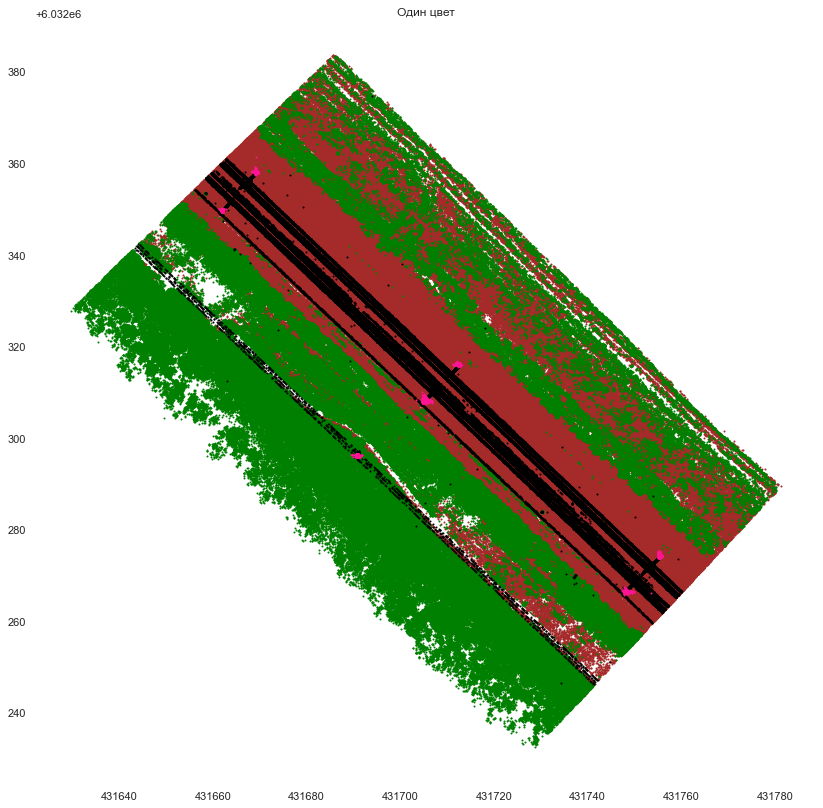

In [66]:
z1 = df_1_test['Easting']    #  x - координаты точек
z2 = df_1_test['Northing']    #  y - координаты точек

fig, ax = plt.subplots()

ax.scatter(z1, z2,
           c = 'brown', s = 1)    #  цвет точек

ax.set_facecolor('white')     #  цвет области Axes
ax.set_title('Один цвет')     #  заголовок для Axes

fig.set_figwidth(8)     #  ширина и
fig.set_figheight(8)    #  высота "Figure"

z3 = df_2_test['Easting']    #  x - координаты точек
z4 = df_2_test['Northing']    #  y - координаты точек
ax.scatter(z3, z4,
           c = 'green', s = 1)    #  цвет точек

z5 = df_3_test['Easting']    #  x - координаты точек
z6 = df_3_test['Northing']    #  y - координаты точек
ax.scatter(z5, z6,
           c = 'black', s = 1)    #  цвет точек

z7 = df_4_test['Easting']    #  x - координаты точек
z8 = df_4_test['Northing']    #  y - координаты точек
ax.scatter(z7, z8,
           c = 'black', s = 1)    #  цвет точек

z9 = df_5_test['Easting']    #  x - координаты точек
z10 = df_5_test['Northing']    #  y - координаты точек
ax.scatter(z9, z10,
           c = 'deeppink', s = 1)    #  цвет точек

#z11 = df_6_test['Easting']    #  x - координаты точек
#z12 = df_6_test['Northing']    #  y - координаты точек
#ax.scatter(z11, z12,
#           c = 'yellow', s = 1)    #  цвет точек

fig.set_figwidth(14)
fig.set_figheight(14)
plt.show()